#0. Chargement des données

1. connectez vous au compte de stockage et importez les datasets du challenge yelp

In [ ]:
spark.conf.set(
  "fs.azure.account.key.storagestudent.blob.core.windows.net", 
  "8ykAjWw0X+FVY8PnmVhnY5XyDdbpBLceLsFTbuTttdn2W76+sdAsSwYNQ9E+H8Oxlsay8/uCm8ayyWq73kB82Q=="
)

In [ ]:
datasets = {
  dataset: spark.read.load( 
    "wasbs://default@storagestudent.blob.core.windows.net/datasets/S8-4/Exo/restaurant-data-with-consumer-ratings/{0}.csv".format(dataset), 
    format="csv",
    header="true"
  )
  for dataset in [
    "chefmozaccepts", 
    "chefmozcuisine", 
    "chefmozhours4", 
    "chefmozparking", 
    "geoplaces2", 
    "rating_final", 
    "usercuisine", 
    "userpayment", 
    "userprofile"
  ]
} 

In [ ]:
datasets

Out[3]: {'chefmozaccepts': DataFrame[placeID: string, Rpayment: string],
 'chefmozcuisine': DataFrame[placeID: string, Rcuisine: string],
 'chefmozhours4': DataFrame[placeID: string, hours: string, days: string],
 'chefmozparking': DataFrame[placeID: string, parking_lot: string],
 'geoplaces2': DataFrame[placeID: string, latitude: string, longitude: string, the_geom_meter: string, name: string, address: string, city: string, state: string, country: string, fax: string, zip: string, alcohol: string, smoking_area: string, dress_code: string, accessibility: string, price: string, url: string, Rambience: string, franchise: string, area: string, other_services: string],
 'rating_final': DataFrame[userID: string, placeID: string, rating: string, food_rating: string, service_rating: string],
 'usercuisine': DataFrame[userID: string, Rcuisine: string],
 'userpayment': DataFrame[userID: string, Upayment: string],
 'userprofile': DataFrame[userID: string, latitude: string, longitude: string, smoker: string, drink_level: string, dress_preference: string, ambience: string, transport: string, marital_status: string, hijos: string, birth_year: string, interest: string, personality: string, religion: string, activity: string, color: string, weight: string, budget: string, height: string]}

2. créez trois objets `rating`, `user`, `place`, contenant respectivement les datasets `rating_final`, `user_profile` et `geoplaces2`

In [ ]:
rating = datasets["rating_final"]
user = datasets["userprofile"]
place = datasets["geoplaces2"]

# <font color='blus'>1. Cleaning des données (Recodage du label, typage et jointures)</font>

3. Dans le dataframe `rating`, transformez la variable `rating` pour qu'elle vale 1 lorsque `rating` vaut `2` et `0` sinon

In [ ]:
from pyspark.sql import functions as F

rating_cleaned = rating.select(F.col("userID"), F.col("placeID"),F.when(F.col("rating") == "2",1).otherwise(0).alias("label"))


display(rating_cleaned)

userID,placeID,label
U1077,135085,1
U1077,135038,1
U1077,132825,1
U1077,135060,0
U1068,135104,0
U1068,132740,0
U1068,132663,0
U1068,132732,0
U1068,132630,0
U1067,132584,1


4. Formattez la table `user` afin que les colonnes soient du type adéquat

In [ ]:
display(user.head(3))

userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69


In [ ]:
user.printSchema()

root
-- userID: string (nullable = true)
-- latitude: string (nullable = true)
-- longitude: string (nullable = true)
-- smoker: string (nullable = true)
-- drink_level: string (nullable = true)
-- dress_preference: string (nullable = true)
-- ambience: string (nullable = true)
-- transport: string (nullable = true)
-- marital_status: string (nullable = true)
-- hijos: string (nullable = true)
-- birth_year: string (nullable = true)
-- interest: string (nullable = true)
-- personality: string (nullable = true)
-- religion: string (nullable = true)
-- activity: string (nullable = true)
-- color: string (nullable = true)
-- weight: string (nullable = true)
-- budget: string (nullable = true)
-- height: string (nullable = true)

In [ ]:
from pyspark.sql.types import *

user_cleaned = user.select(
  F.col("userID"),
  #F.col("latitude"),
  #F.col("longitude"),
  F.col("smoker"),
  F.col("drink_level"),
  F.col("dress_preference"),
  F.col("ambience"),
  F.col("transport"),
  F.col("marital_status"),
  F.col("hijos"),
  F.col("birth_year").cast(IntegerType()),
  F.col("interest"),
  F.col("personality"),
  F.col("religion"),
  F.col("activity"),
  F.col("color"),
  F.col("weight").cast(FloatType()),
  F.col("budget"),
  F.col("height").cast(FloatType()),
)

display(user_cleaned)

userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
U1001,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69.0,medium,1.77
U1002,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40.0,low,1.87
U1003,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60.0,low,1.69
U1004,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44.0,medium,1.53
U1005,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65.0,medium,1.69
U1006,true,social drinker,no preference,friends,car owner,single,independent,1989,variety,hard-worker,none,student,blue,75.0,medium,1.8
U1007,false,casual drinker,informal,solitary,public,single,independent,1989,variety,thrifty-protector,Catholic,student,purple,60.0,low,1.59
U1008,false,social drinker,formal,solitary,public,single,independent,1989,technology,hard-worker,Catholic,student,green,68.0,low,1.72
U1009,false,abstemious,formal,family,on foot,single,kids,1991,variety,thrifty-protector,Catholic,student,green,75.0,medium,1.78
U1010,false,social drinker,no preference,friends,car owner,married,kids,1987,technology,hard-worker,none,student,green,40.0,medium,1.67


5. Même exercice avec place

In [ ]:
display(place.head(3))

placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC464A41,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
132825,22.1473922,-100.983092,0101000020957F00001AD016568C4858C1243261274BA54B41,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,78280,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
135106,22.1497088,-100.9760928,0101000020957F0000649D6F21634858C119AE9BF528A34B41,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none


In [ ]:
place.printSchema()

root
-- placeID: string (nullable = true)
-- latitude: string (nullable = true)
-- longitude: string (nullable = true)
-- the_geom_meter: string (nullable = true)
-- name: string (nullable = true)
-- address: string (nullable = true)
-- city: string (nullable = true)
-- state: string (nullable = true)
-- country: string (nullable = true)
-- fax: string (nullable = true)
-- zip: string (nullable = true)
-- alcohol: string (nullable = true)
-- smoking_area: string (nullable = true)
-- dress_code: string (nullable = true)
-- accessibility: string (nullable = true)
-- price: string (nullable = true)
-- url: string (nullable = true)
-- Rambience: string (nullable = true)
-- franchise: string (nullable = true)
-- area: string (nullable = true)
-- other_services: string (nullable = true)

In [ ]:
place_cleaned = place.select(
  F.col("placeID").cast(DoubleType()),
  #F.col("latitude"),
  #F.col("longitude"),
  #F.col("the_geom_meter"),
  #F.col("name"),
  #F.col("address"),
  #F.col("city"),
  #F.col("state"),
  #F.col("country"),
  #F.col("fax"),
  F.col("zip").cast(IntegerType()),
  F.col("alcohol"),
  F.col("smoking_area"),
  F.col("dress_code"),
  F.col("accessibility"),
  F.col("price"),
  #F.col("url"),
  #F.col("Rambience"),
  F.col("franchise"),
  F.col("area"),
  #F.col("other_services"),
)

display(place_cleaned)

placeID,zip,alcohol,smoking_area,dress_code,accessibility,price,franchise,area
134999.0,null,No_Alcohol_Served,none,informal,no_accessibility,medium,f,closed
132825.0,78280,No_Alcohol_Served,none,informal,completely,low,f,open
135106.0,78000,Wine-Beer,only at bar,informal,partially,medium,f,open
132667.0,null,No_Alcohol_Served,none,informal,completely,low,t,closed
132613.0,null,No_Alcohol_Served,permitted,informal,completely,medium,t,closed
135040.0,74000,Wine-Beer,none,informal,no_accessibility,high,f,closed
132732.0,87018,No_Alcohol_Served,none,casual,completely,low,f,open
132875.0,null,Wine-Beer,section,informal,no_accessibility,high,t,open
132609.0,null,No_Alcohol_Served,not permitted,informal,completely,low,t,closed
135082.0,78421,No_Alcohol_Served,none,informal,no_accessibility,medium,f,closed


6.1 Effectuez une jointure entre les tables `user` et `rating` préalablement nettoyées;

In [ ]:
training_basis = rating_cleaned.join(user_cleaned, "userID" , "left").dropna()
display(training_basis.head(3))


userID,placeID,label,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
U1077,135085,1,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65.0,medium,1.7100000381469727
U1077,135038,1,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65.0,medium,1.7100000381469727
U1077,132825,1,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65.0,medium,1.7100000381469727


6.2 Puis, effectuez une jointure entre la table obtenue à la premiere jointure avec la table `place`.

In [ ]:
training_basis = training_basis.join(place_cleaned, "placeID", "left").dropna()

#2. Pre processing pour MLlib

7. Appliquez les manipulations de preprocessing sur la table jointe afin de la préparer à l'entraînement d'un modèle dans spark ML, vous devrez choisir comme variable cible `rating` et le choix des variables explicatives vous revient

**Le pre-processing va consister en les étapes suivantes :**
* Identifier la liste des variables qualitatives
* Transformer les modalités des variables de type chaine de caracteres en valeurs numériques; pour ce faire, `StringIndexer` est mise en oeuvre.
* Ensuite encoder sou forme de vacteur les valeurs numériques représentant les variables catégorielles. La classe `OneHotEncoderEstimator` permet d'arriver à ces fins.
* Enfin, l'encodage se fai séparément pour chacune des variables catégorielles. La classe `VectorAssembler` est utilisée pour rassembler tous les vecteurs issus de l'encodage dans un dataframe unique. C'est sur les variables explicatives pre-processées de ce dernier que les algorithmes de ML vont être appliqués.

## 2.1 Indexation des variables qualitatives

In [ ]:
training_basis.printSchema()

root
-- placeID: string (nullable = true)
-- userID: string (nullable = true)
-- label: integer (nullable = false)
-- smoker: string (nullable = true)
-- drink_level: string (nullable = true)
-- dress_preference: string (nullable = true)
-- ambience: string (nullable = true)
-- transport: string (nullable = true)
-- marital_status: string (nullable = true)
-- hijos: string (nullable = true)
-- birth_year: integer (nullable = true)
-- interest: string (nullable = true)
-- personality: string (nullable = true)
-- religion: string (nullable = true)
-- activity: string (nullable = true)
-- color: string (nullable = true)
-- weight: float (nullable = true)
-- budget: string (nullable = true)
-- height: float (nullable = true)
-- zip: integer (nullable = true)
-- alcohol: string (nullable = true)
-- smoking_area: string (nullable = true)
-- dress_code: string (nullable = true)
-- accessibility: string (nullable = true)
-- price: string (nullable = true)
-- franchise: string (nullable = true)
-- area: string (nullable = true)

In [ ]:
display(training_basis.head(3))

placeID,userID,label,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,zip,alcohol,smoking_area,dress_code,accessibility,price,franchise,area
135085,U1077,1,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65.0,medium,1.7100000381469727,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,f,closed
135038,U1077,1,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65.0,medium,1.7100000381469727,78000,No_Alcohol_Served,section,informal,no_accessibility,medium,f,closed
132825,U1077,1,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65.0,medium,1.7100000381469727,78280,No_Alcohol_Served,none,informal,completely,low,f,open


In [ ]:
list_feature_quant = ['weight', 'height']
list_feature_exclude = ['placeID','userID', 'color']
list_label = ['label']
list_feature_qual = [col for col in training_basis.columns if col not in list_feature_quant+list_feature_exclude+list_label]
print(list_feature_qual)

['smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'birth_year', 'interest', 'personality', 'religion', 'activity', 'budget', 'zip', 'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'franchise', 'area']

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier


`StringIndexer` va permettre d'indexer des variables de type chaine de caracteres. L'indexation est appliquée sur chacune des variables, 
d'où la consrtuction de la liste `list_StringIndexer` contenant des elements de type `StringIndexer`.

In [ ]:
from pyspark.ml.feature import StringIndexer, IndexToString

list_stringIndexer = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in list_feature_qual]

## 2.2 Vectorisation des données qualitatives

L'encodage consiste a binariser les indices des variables categorielles numérisées.

Ici, un encodeur est créé, prenant en entrée **la liste** des variables explicatives `list_feature_qual` suffixées par '_index' et 
ayant en sortie des colonnes suffixées par '_vec'

In [ ]:
import pyspark
from pyspark.ml.feature import OneHotEncoder

one_hot_encoder = OneHotEncoder(
  inputCols=[col+"_index" for col in list_feature_qual],
  outputCols=[col+"_vec" for col in list_feature_qual]
)


## 2.3 Assemblage des features vectorisées.

Le nouveau dataframe Spark obtenu ne contiendra que des valeurs numériques.
Les variables continues et les variables categorielles qui ont été binarisées sont assemblées avec `VectorAssembler` 
* En entrée : la liste de variables suffixées `_vec`
* En sortie : la liste des variables vectorisées assemblées; cette liste est adressée par le nom `features`

In [ ]:
from pyspark.ml.feature import VectorAssembler
list_feature = [col+"_vec" for col in list_feature_qual] + list_feature_quant
vector_assembler = VectorAssembler(
    inputCols= list_feature,
    outputCol="features",
)

## 2.4 Creation du pipeline de traitement de données

In [ ]:
from pyspark.ml import Pipeline

preprocessing_pipeline = Pipeline(
  stages= [*list_stringIndexer, one_hot_encoder, vector_assembler]
)

In [ ]:
preprocessing_pipeline_fitted = preprocessing_pipeline.fit(training_basis)

training_basis_preprocessed = preprocessing_pipeline_fitted.transform(training_basis)

In [ ]:
training_basis_preprocessed.printSchema()

root
-- placeID: string (nullable = true)
-- userID: string (nullable = true)
-- label: integer (nullable = false)
-- smoker: string (nullable = true)
-- drink_level: string (nullable = true)
-- dress_preference: string (nullable = true)
-- ambience: string (nullable = true)
-- transport: string (nullable = true)
-- marital_status: string (nullable = true)
-- hijos: string (nullable = true)
-- birth_year: integer (nullable = true)
-- interest: string (nullable = true)
-- personality: string (nullable = true)
-- religion: string (nullable = true)
-- activity: string (nullable = true)
-- color: string (nullable = true)
-- weight: float (nullable = true)
-- budget: string (nullable = true)
-- height: float (nullable = true)
-- zip: integer (nullable = true)
-- alcohol: string (nullable = true)
-- smoking_area: string (nullable = true)
-- dress_code: string (nullable = true)
-- accessibility: string (nullable = true)
-- price: string (nullable = true)
-- franchise: string (nullable = true)
-- area: string (nullable = true)
-- smoker_index: double (nullable = false)
-- drink_level_index: double (nullable = false)
-- dress_preference_index: double (nullable = false)
-- ambience_index: double (nullable = false)
-- transport_index: double (nullable = false)
-- marital_status_index: double (nullable = false)
-- hijos_index: double (nullable = false)
-- birth_year_index: double (nullable = false)
-- interest_index: double (nullable = false)
-- personality_index: double (nullable = false)
-- religion_index: double (nullable = false)
-- activity_index: double (nullable = false)
-- budget_index: double (nullable = false)
-- zip_index: double (nullable = false)
-- alcohol_index: double (nullable = false)
-- smoking_area_index: double (nullable = false)
-- dress_code_index: double (nullable = false)
-- accessibility_index: double (nullable = false)
-- price_index: double (nullable = false)
-- franchise_index: double (nullable = false)
-- area_index: double (nullable = false)
-- marital_status_vec: vector (nullable = true)
-- smoking_area_vec: vector (nullable = true)
-- drink_level_vec: vector (nullable = true)
-- accessibility_vec: vector (nullable = true)
-- personality_vec: vector (nullable = true)
-- interest_vec: vector (nullable = true)
-- dress_code_vec: vector (nullable = true)
-- zip_vec: vector (nullable = true)
-- dress_preference_vec: vector (nullable = true)
-- price_vec: vector (nullable = true)
-- alcohol_vec: vector (nullable = true)
-- religion_vec: vector (nullable = true)
-- budget_vec: vector (nullable = true)
-- hijos_vec: vector (nullable = true)
-- transport_vec: vector (nullable = true)
-- franchise_vec: vector (nullable = true)
-- activity_vec: vector (nullable = true)
-- ambience_vec: vector (nullable = true)
-- area_vec: vector (nullable = true)
-- smoker_vec: vector (nullable = true)
-- birth_year_vec: vector (nullable = true)
-- features: vector (nullable = true)

In [ ]:
rating_cleaned.printSchema()

root
-- userID: string (nullable = true)
-- placeID: string (nullable = true)
-- label: integer (nullable = false)

In [ ]:
rating_cleaned_label = rating_cleaned.select('userID','label')
display(rating_cleaned_label.head(3))

userID,label
U1077,1
U1077,1
U1077,1


#3. Entrainement du modèle

##3.1 Regression logistique

8. Séparez vos données en un échantillon train et test

In [ ]:
training_basis_preprocessed_train, training_basis_preprocessed_test = training_basis_preprocessed.randomSplit([0.7, 0.3], seed=100)

9. Entraînez un random forest classifier ou un autre modèle de votre choix afin de prédire la valeur de rating. Evaluez ensuite les performances de ce modèle.
Vous pouvez bien entendu faire une grid search afin de déterminer des valeurs bien choisies des hyper paramètres.

In [ ]:
from pyspark.ml.classification import LogisticRegression
# Le modele ne prendra en compte que les variables explicatives issues de l'assembla de la vectorisation
lr = LogisticRegression(labelCol="label", featuresCol="features")

In [ ]:
lr_model = lr.fit(training_basis_preprocessed_train)

In [ ]:
training_basis_preprocessed_train_pred = lr_model.transform(training_basis_preprocessed_train)
training_basis_preprocessed_test_pred = lr_model.transform(training_basis_preprocessed_test)

##3.2 Evaluation et analyse du modele LR

10. Evaluez maintenant le modèle à l'aide des techniques habituelles.

La clasification est binaire; un évaluateur bianire est utilisé.

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", metricName="areaUnderROC")

evaluation_train = evaluator_auc.evaluate(training_basis_preprocessed_train_pred)
evaluation_test =  evaluator_auc.evaluate(training_basis_preprocessed_test_pred)

print(
  "AUC train : {0} - AUC test : {1}"
  .format(
    evaluation_train, 
    evaluation_test
  )
)

AUC train : 0.8644142641257617 - AUC test : 0.6753646881287727

In [ ]:
from pyspark.sql.types import *
from pyspark.sql import functions as F

cf_count = training_basis_preprocessed_test_pred.select(F.col("prediction"), F.col("label").cast(IntegerType()))\
                           .groupBy("prediction")\
                           .pivot("label")\
                           .count() 

display(cf_count)

prediction,0,1
0.0,71,32
1.0,41,39


In [ ]:
total_count = training_basis_preprocessed_test_pred.count()

print(total_count)
cf = cf_count.select(
  F.col("prediction"),
  (F.col("0") / total_count).alias("% 0"),
  (F.col("1") / total_count).alias("% 1")
)
display(cf)

prediction,% 0,% 1
0.0,0.3879781420765027,0.17486338797814208
1.0,0.22404371584699453,0.21311475409836064


0.3879781420765027   0.17486338797814208

0.22404371584699453 0.21311475409836064

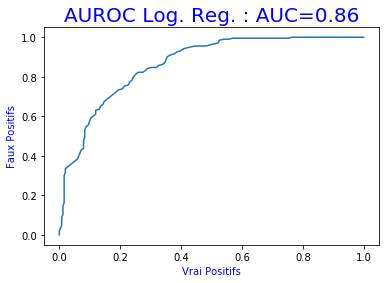

In [ ]:
import matplotlib.pyplot as plt

modelSummary = lr_model.summary
roc = modelSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('Faux Positifs', color='blue')
plt.xlabel('Vrai Positifs', color='blue')
plt.title('AUROC Log. Reg. : AUC={:.2f}'.format(modelSummary.areaUnderROC), color='blue', size=20)
plt.show()
#print('AUC : dataset d\'entraînement : ' + str(trainingSummary.areaUnderROC))

In [ ]:
#dir(pyspark.ml.classification.RandomForestClassificationModel)

# 4. Classification Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier, RandomForestClassificationModel

rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)


In [ ]:
from pyspark.ml import Pipeline

rf_pipeline = Pipeline(
  stages= [*list_stringIndexer, one_hot_encoder, vector_assembler, rf]
)

In [ ]:
#rf_model = rf_pipeline.fit(training_basis_preprocessed_train)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
rf_model = rf.fit(training_basis_preprocessed_train)

# Make predictions.
training_basis_preprocessed_test_train = rf_model.transform(training_basis_preprocessed_train)
training_basis_preprocessed_test_pred = rf_model.transform(training_basis_preprocessed_test)


evaluator_auc = BinaryClassificationEvaluator( metricName="areaUnderROC")

evaluation_train = evaluator_auc.evaluate(training_basis_preprocessed_train_pred)
evaluation_test =  evaluator_auc.evaluate(training_basis_preprocessed_test_pred)

print(
  "RF AUC train : {0} - RF AUC test : {1}"
  .format(
    evaluation_train, 
    evaluation_test
  )
)

RF AUC train : 0.8644142641257617 - RF AUC test : 0.622422032193159

In [ ]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbt_model = gbt.fit(training_basis_preprocessed_train)
training_basis_preprocessed_test_pred = gbt_model.transform(training_basis_preprocessed_test)
training_basis_preprocessed_test_pred = gbt_model.transform(training_basis_preprocessed_train)

evaluator_auc = BinaryClassificationEvaluator( metricName="areaUnderROC")

evaluation_train = evaluator_auc.evaluate(training_basis_preprocessed_train_pred)
evaluation_test =  evaluator_auc.evaluate(training_basis_preprocessed_test_pred)

print("GBT AUC train : {0:.2f} - GBT AUC test : {1:.2f}".format(evaluation_train, evaluation_test))

GBT AUC train : 0.86 - GBT AUC test : 0.92

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [5, 15])
             .build())

evaluator_auc = BinaryClassificationEvaluator(metricName="areaUnderROC")

cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator_auc, numFolds=5)
# Run cross validations.  
cv_model = cv.fit(training_basis_preprocessed_train)
training_basis_preprocessed_test_pred = cv_model.transform(training_basis_preprocessed_test)
evaluator_auc.evaluate(training_basis_preprocessed_test_pred)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)
Out[41]: 0.7068661971830987

In [ ]:
bgt_best_model = cv_model.bestModel
training_basis_preprocessed_test_pred = bgt_best_model.transform(training_basis_preprocessed_test)
best_evaluation_test = evaluator_auc.evaluate(training_basis_preprocessed_test_pred)
print("Best GBT AUC test : {0:.2f}".format(best_evaluation_test))

Best GBT AUC test : 0.71

preds = training_basis_preprocessed_test_pred.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))

points = CurveMetrics(preds).get_curve('roc')